In [3]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [5]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


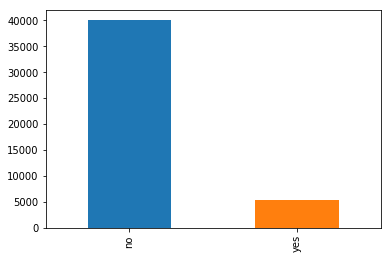

In [7]:
df.y.value_counts().plot.bar()

In [17]:
target = "y"
y = np.where(df[target] == "yes", 1, 0)
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("est", tree.DecisionTreeClassifier(max_depth = 3))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)

0.9012090828664111

(<matplotlib.figure.Figure at 0x1a10709b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a10a97940>)

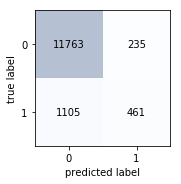

In [18]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [19]:
est = pipe.steps[-1][-1]
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns)

In [21]:
!dot -Tpng tree.dot -o tree.png

In [22]:
pd.DataFrame({"feature": X.columns,
    "importance": est.feature_importances_}).sort_values("importance", ascending = False)

,feature,importance
3,duration,0.588228
40,poutcome_success,0.350978
34,month_mar,0.055767
27,contact_unknown,0.005027
0,age,0.000000
31,month_jan,0.000000
24,housing_yes,0.000000
25,loan_yes,0.000000
26,contact_telephone,0.000000
28,month_aug,0.000000


In [39]:
y_test_prob = pipe.predict_proba(X_test)

In [41]:
len(np.unique(y_test_prob))

18